In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load transformed dataset
df = pd.read_csv('../../data/processed/transformed_data.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,NaN,NaN,NaN,NaN,1.264411,1.140915,NEAR BAY
1,-1.322844,1.043185,-0.607019,1.202953,1.140615,0.871267,1.208457,1.264411,0.839045,NEAR BAY
2,-1.332827,1.038503,1.856182,-1.195101,NaN,NaN,NaN,1.126602,0.814787,NEAR BAY
3,-1.337818,1.038503,1.856182,-1.804267,-2.762127,NaN,-2.842005,0.747298,0.772467,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.874327,-1.507164,NaN,-1.565578,0.026897,0.776062,NEAR BAY


In [22]:
# Drop rows with missing values
df = df.dropna(subset=['median_income', 'median_house_value'])  # keep relevant columns
X = df[['median_income']]
y = df['median_house_value']

print("Shape after dropping NaNs:", X.shape)

Shape after dropping NaNs: (16172, 1)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (12937, 1)
Test shape: (3235, 1)


In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get slope and intercept
print("Slope (Coefficient):", lr.coef_[0])
print("Intercept:", lr.intercept_)

Slope (Coefficient): 0.479240824741219
Intercept: -0.1159473983652121


In [25]:
from sklearn.impute import SimpleImputer

# Impute median for numeric columns
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df[['median_income']])
y = df['median_house_value'].values

print("Shape after imputation:", X.shape)

Shape after imputation: (16172, 1)


In [26]:
import os
import pickle

# Create the folder if it doesn't exist
os.makedirs('../src/imputers', exist_ok=True)

# Now save the imputer
with open('../src/imputers/median_imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)

print("Median imputer saved successfully!")

Median imputer saved successfully!


In [27]:
y_pred = lr.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.83
Mean Absolute Error: 0.65
R^2 Score: 0.25


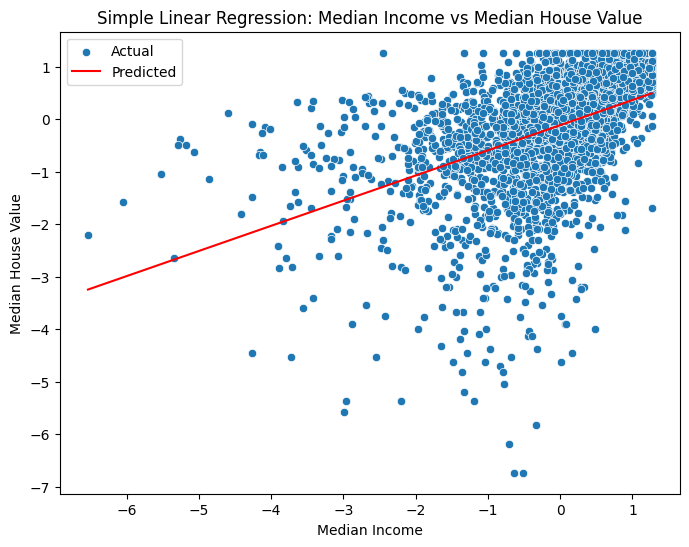

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature column (make sure it matches your DataFrame)
feature_col = 'median_income'

plt.figure(figsize=(8,6))

# Use the DataFrame column as Series
sns.scatterplot(x=X_test[feature_col], y=y_test, label='Actual')
sns.lineplot(x=X_test[feature_col], y=y_pred, color='red', label='Predicted')

plt.title('Simple Linear Regression: Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

In [32]:
os.makedirs('../src/models', exist_ok=True)

with open('../src/models/simple_linear_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

print("Simple Linear Regression model saved successfully!")

Simple Linear Regression model saved successfully!
